
## **UTS**



**NAMA : AISYATUR RADIAH**

**NIM  : 200411100116**

**UTS  : PENAMBANGAN DATA (A)**

Lakukan analisa terhadap data pada  https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra  dengan menggunakan klasifikasi

- metode KNN

- metode pohon keputusan (Desision tree)

Proses analisa dilaporkan dan diupload di github ( menggunakan jupyter book)

###**Metode KNN**

Algoritma k-Neighbor adalah agoritma supervided learning dimana hasil dari instance yang baru diklasifikasikan berdasarkan mayoritas dari kategori k-tetangga terdekat.

KNN (K-Nearest Neighbor) adalah algoritma klasifikasi terawasi sederhana yang dapat kita gunakan untuk menetapkan kelas ke titik data baru. Hal ini dapat digunakan untuk regresi juga, KNN tidak membuat asumsi pada distribusi data, sehingga non-parametrik. Itu menyimpan semua data pelatihan untuk membuat prediksi masa depan dengan menghitung kesamaan antara sampel input dan setiap instance pelatihan.


### Cara Kerja KNN

Algoritma k-Nearest Neighbor menggunakan Neighborhood Classification sebagai nilai prediksi dari nilai instance yang baru. Adapun cara kerja dari algoritma K-NN yaitu :

1. Tentukan jumlah tetangga yg akan dilakukan perhitungkan (k), misalnya kita tentukan 3 tetangga terdekat (k = 3).
2. hitung jarak setiap tetangga terhadap rumah tersebut, lalu urutkan hasilnya berdasarkan jarak, mulai dari yang terkecil ke yang terbesar.
3. ambil 3 (k) tetangga yg paling dekat, lalu tentukan kelas dari data baru tersebut sesuai dengan tetangga terdekatnya.



#### Persiapan Lingkungan



1.   Impor *train_test_split* dari *sklearn*
2.    Impor *KNeighborsClassifier* dari *sklearn*
3. Impor *pandas library*




In [ ]:
from sklearn.model_selection import train_test_split #split dataset into train and test data

In [ ]:
from sklearn.neighbors import KNeighborsClassifier# Create KNN classifier

In [ ]:
import pandas as pd

In [ ]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning, append=True)

In [ ]:
dataset_url = "https://raw.githubusercontent.com/aisyaturradiah/datamining/gh-pages/dataR2.csv"

In [ ]:
df = pd.read_csv(dataset_url)
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [ ]:
df.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474283,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


terdapat data yang ditampilkan yaitu data Age, BMI, Glucose, Insulin, HOMA, Leptin, Adiponectin, Resistin, MCP.1, dan juga Classification

Malakukan pengecekan dari number rows dan juga columns datasetnya

In [ ]:
#check number of rows and columns in dataset
df.shape

(116, 10)

In [ ]:
#check number of rows and columns in dataset
df.shape

(116, 10)

### Melakukan Perhitungan Data
*   Melakukan pemisahan kolom "Classification" dari *dataframe*
*   Melakukan pengambilan kolom "Classification" sebagai target kolom untuk kategori kelas
*   Melakukan pemisahan  data latih dengan data tes


```
# data latih (nilai data)
X_train 

# data tes (nilai data)
X_test 

# data latih (kelas data)
y_train

# data tes (kelas data)
y_test
```





In [ ]:
#create a dataframe with all training data except the target column
X = df.drop(columns=["Classification"])#check that the target variable has been removed
X.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920


In [ ]:
# separate target values
y = df["Classification"].values  # view target values
y[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
# percent_amount_of_test_data = / HUNDRED_PERCENT
percent_amount_of_test_data = 0.2

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = percent_amount_of_test_data, random_state=1, stratify=y)



*  Menentukan nilai K = 10 (10 tetangga terdekat)
*   Membuat sebuah data latih


```
knn_classifier.fit(train_data)
```




In [ ]:
amount_of_neighbor = 10

In [ ]:
# Fit the classifier to the data
knn = KNeighborsClassifier(n_neighbors = amount_of_neighbor)

# create train data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)





*    Malakukan uji coba atau tes mengenai data target terhadap data latih
*   Menampilkan data predksi 10 data pertama



```
knn_classifier.predict(test_data)
```





In [ ]:
#show first 5 model predictions on the test data
knn.predict(X_test)

array([1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       1, 2])



*   Malakukan Cetak prediksi nilai dari data tes yang dilakukan



```
knn_classifier.score(test_data)
```





In [ ]:
#check accuracy of our model on the test data
knn.score(X_test, y_test)

0.5

*  Melakukan pengecekan sebuah data dengan nilainya 

```
# Test Data (1)
[
    [
        45, 
        21.30394858, 
        102, 
        13.852, 
        3.4851632, 
        7.6476, 
        21.056625, 
        23.03408,	
        552.444
    ]
]
```



In [ ]:
# Custom value to predict (1) based on manual calculation
knn.predict([[45, 21.30394858, 102, 13.852, 3.4851632, 7.6476, 21.056625, 23.03408,	552.444]])

array([1])

In [ ]:
# Custom value to predict (2)
knn.predict([[72,25.59,82,2.82,0.570392,24.96,33.75,3.27,392.46]])

array([2])

In [ ]:
# Custom value to predict (3) based on manual calculation
knn.predict([[20,35,   79,2.5, 0.4,     25,   32,   3.1, 393]])

array([1])

### Terdapat kesimpulan mengenai hasil analisa dari metode KNN
Dataset Breast Cances Combria terdiri dari 116 data, yang dimana data yang diambil yaitu **80%** dari data latih yaitu data Breast Cancer Combria. Kemudian data yang diambil yaitu data tesnya sebanyak **20%** dari data Breast Cancer Combria untuk data tesnya, sehingga nanti di tetapkan mengenai nilai K = 10, dan mengenai hasilnya yaitu 10 data pertama dari 20% data latih. Sehingga ddapat kita lihat dibawah ini yaitu:

```
"""
1 = Healthy controls 
2 = Patients
"""
[1, 1, 1, 2, 1, 2, 2, 2, 2, 1]
```






Dari penjelasan mengenai kesimpulan diatas maka hasil akurasi yaitu  $ 0.5\% $
Keuntungan dengan Algoritma K-NN yaitu kuat dalam mentraining data yang noisy,Algoritma K-NN sangat efektif jika datanya besar, dan mudah diimplementasikan.

### **Metode Decision Tree**

### **Algoritma Decision Tree**

Decision tree adalah metode non parametrik yang digunakan untuk klasifikasi dan regresi. Decision tree merupakan metode non parametrik yang digunakan untuk klasifikasi dan regresi. Tujuan dari decision tree adalah membuat model yang memprediksi nilai variabel target dengan mengikuti aturan keputusan sederhana dari fitur data yang tersedia.



Tujuan : membuat model yang memprediksi nilai variabel target dengan mengikuti aturan keputusan sederhana dari fitur data yang tersedia.

Terdapat beberapa komponen dalam Decision Tree ini, antara lain sebagai berikut :
1. Root Node: akar, karena dalam decesion tree ini adalah pohon terbalik maka nantinya akan menghasilkan sebuah pohon keputusan, jadi akan berada diatasnya.
2. Leaf Node: Daun, yang berada pada cabang, dari root node yang dibuat, sehingga  nantinya akan menghasilkan sebuah ranting, atau cabang.
3. Internal Node: yaitu bagian yang berada antara root node dan leaf node.

* Decision Tree adalah jenis white box algoritma dalam machine learning yang 
menggunakan internal decision making logic. Hal ini tidak terdapat dapat pada jenis black box algoritma yaitu neural network. Waktu pengambilan data training decision tree lebih cepat dibandingkan Neural Network.
* Fungsi Kompleksitas Decision Tree adalah fungsi dari jumlah yang records serta atribut dalam data yang diberikan.

### **Kerja Algoritma Decision Tree**
* Memilih atribut terbaik menggunakan Attribution Selection Measures (ASM) untuk membagi records data
* Membuat atribut menjadi decision node dan memecah dataset menjadi subsets yang lebih kecil.
* Mulai membangun pohon dengan mengulangi proses ini secara rekursif, untuk setiap cabang sampai salah satu dari kondisi tersebut akan cocok

![original image](https://cdn.mathpix.com/snip/images/z9qk6qpPrC1Jp2o_xKzcXC8bWwIVeHcHj_H6wbaRTrs.original.fullsize.png)

Melakukan import 

In [ ]:
import pandas as pd
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

Mengecek data url

In [ ]:
url = 'https://raw.githubusercontent.com/aisyaturradiah/datamining/gh-pages/dataR2.csv'
df = pd.read_csv(url)

Menampilkan data dari head

In [ ]:
df.head(-1)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
110,54,36.050000,119,11.910,3.495982,89.2700,8.010000,5.06000,218.280,2
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2


Menampilkan seluruh dataset

In [ ]:
df.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474283,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


Mengecek variabel independent dari Classification, dengan x sebagai variabel independent

In [ ]:
# x sebagai variable independent
x =df.drop(['Classification'], axis = 1)
x.head

<bound method NDFrame.head of      Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  \
0     48  23.500000       70    2.707  0.467409   8.8071     9.702400   
1     83  20.690495       92    3.115  0.706897   8.8438     5.429285   
2     82  23.124670       91    4.498  1.009651  17.9393    22.432040   
3     68  21.367521       77    3.226  0.612725   9.8827     7.169560   
4     86  21.111111       92    3.549  0.805386   6.6994     4.819240   
..   ...        ...      ...      ...       ...      ...          ...   
111   45  26.850000       92    3.330  0.755688  54.6800    12.100000   
112   62  26.840000      100    4.530  1.117400  12.4500    21.420000   
113   65  32.050000       97    5.730  1.370998  61.4800    22.540000   
114   72  25.590000       82    2.820  0.570392  24.9600    33.750000   
115   86  27.180000      138   19.910  6.777364  90.2800    14.110000   

     Resistin    MCP.1  
0     7.99585  417.114  
1     4.06405  468.786  
2     9.27715  554

Mengecek variabel independent dari Classification, dengan y sebagai variabel independent

In [ ]:
# y sebagai variable dependent
y = df['Classification']
y.head

<bound method NDFrame.head of 0      1
1      1
2      1
3      1
4      1
      ..
111    2
112    2
113    2
114    2
115    2
Name: Classification, Length: 116, dtype: int64>

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=0)

In [ ]:
print(x_train)

     Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  \
43    69  32.500000       93    5.430  1.245642  15.1450    11.787960   
98    71  27.915519      104   18.200  4.668907  53.4997     1.656020   
80    59  28.672626       77    3.188  0.605507  17.0220    16.440480   
72    51  18.370000      105    6.030  1.561770   9.6200    12.760000   
31    53  36.790166      101   10.175  2.534932  27.1841    20.030000   
..   ...        ...      ...      ...       ...      ...          ...   
76    55  31.975015       92   16.635  3.775036  37.2234    11.018455   
10    34  21.470000       78    3.469  0.667436  14.5700    13.110000   
28    35  35.250761       90    6.817  1.513374  50.6094     6.966895   
112   62  26.840000      100    4.530  1.117400  12.4500    21.420000   
49    85  26.600000       96    4.462  1.056602   7.8500     7.931700   

     Resistin    MCP.1  
43   11.78796  270.142  
98   49.24184  256.001  
80   31.69040  910.489  
72    3.21000  513.660 

Membangun decision tree dan melakukan prediksi

In [ ]:
# membangun decision tree menggunakan gini
clf = DecisionTreeClassifier(criterion="gini")
clf = clf.fit(x_train,y_train)

#Prediksi data test
y_pred = clf.predict(x_test)

Menampilkan Precision, recall, f1-score dan support

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.80      0.62      0.70        13
           2       0.74      0.88      0.80        16

    accuracy                           0.76        29
   macro avg       0.77      0.75      0.75        29
weighted avg       0.77      0.76      0.75        29



Menampilkan hasil dari decision tree yang dilakukan dengan create the tree plot,  dan juga show the plot

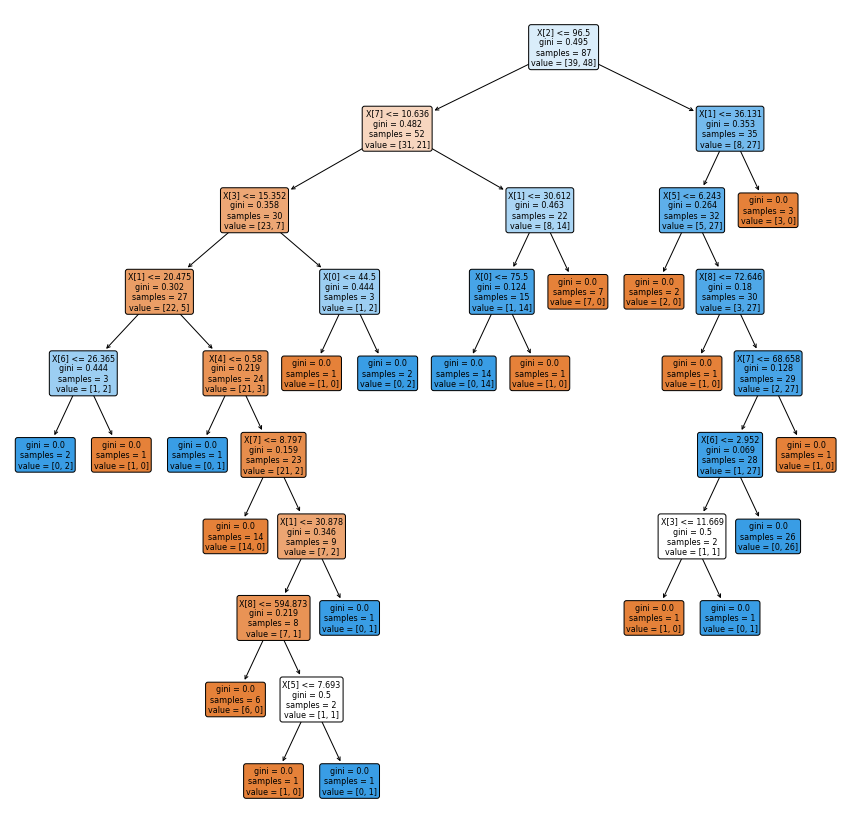

In [ ]:
plt.figure(figsize=(15,15))
#create the tree plot
a = tree.plot_tree(clf,
                   rounded = True,
                   filled = True,
                   fontsize=8)
#show the plot
plt.show()

**Kesimpulan**

Decision tree atau biasa disebut dengan pohon keputusan merupakan salah satu  metode non parametrik yang digunakan  untuk klasifikasi, salah satunya yaitu dataset mengenai Dataset Breast Cances Combria, dari hasil metode yang dilakukan yaitu mulai dari menginport data dari url, melakukan pengecekan seluruh datasetnya, membangun decision tree dan prediksi. Maka didapatkan hasil dari Dataset Breast Cances Combria  yaitu untuk acurracy 0,76%, 0,80%, recall 0,62%, dan fi-score 0,70%. Sehingga pada bagian code trakhir terdapat decision tree dengan menggunakan "gini". Salah satu keuntungan dari pohon keputusan adalah outputnya mudah dibaca dan diinterpretasikan, bahkan tanpa memerlukan pengetahuan statistik. Dan dalam metode decision tree ini terdapat root node, leaf node, dan internal node, dan bisa diliha pada hasil gambar diatas.